# Метрика

Мы используем стандартную для задачи классификации метрику ROC-AUC. Ниже пример использования

In [6]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [198]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 199, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 199, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filena

In [199]:
data = pd.read_csv('./train.csv')

In [200]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [ #казалось бы причем тут кот
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Смотрим, что загрузили

In [201]:
data.sample(5) #смотрим рандомные строчки)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5124,63,79.85,4861.45,Female,0,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),0
4818,70,114.30,8244.3,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
509,18,77.80,1358.6,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,0
5208,20,20.05,406.05,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4470,10,20.45,242.4,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0


Важно понимать, какую задачу мы решаем. Мы хотим научиться по информации об абоненте сотового оператора научиться понимать, уйдет он к другому оператору или нет.

In [202]:
def check_data(data):
    print(f"1)")
    data.info()
    print()
    print(f"2)Количество NaN\n{data.isna().sum()}\n")
    print(f"Количество null\n{data.isnull().sum()}\n")
    print(f"3)Количество дубликатов:\n{data.duplicated().sum()}\n")

In [203]:
check_data(data)

1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOn

## Обрабатываем данные

1) Видим что тип данных в колонке TotalSpent - object, хотя в этой задаче мы рассматриваем его как числовой. Стоит преобразовать во float

In [204]:
def column_to_float(data, column):
  data[column] = data[column].apply(lambda x: float(x) if x != " " else np.nan)

In [205]:
column_to_float(data, "TotalSpent")

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

теперь тип - float

2) Теперь видим 9 пропусков в колонке TotalSpent, удаляем

In [207]:
data = data.dropna()

In [208]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

3) Есть дубликаты, удаляем

In [209]:
data = data.drop_duplicates()

In [210]:
data.duplicated().sum()

0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## 1) Строим диаграммы признаков

### Смотрим численные признаки:

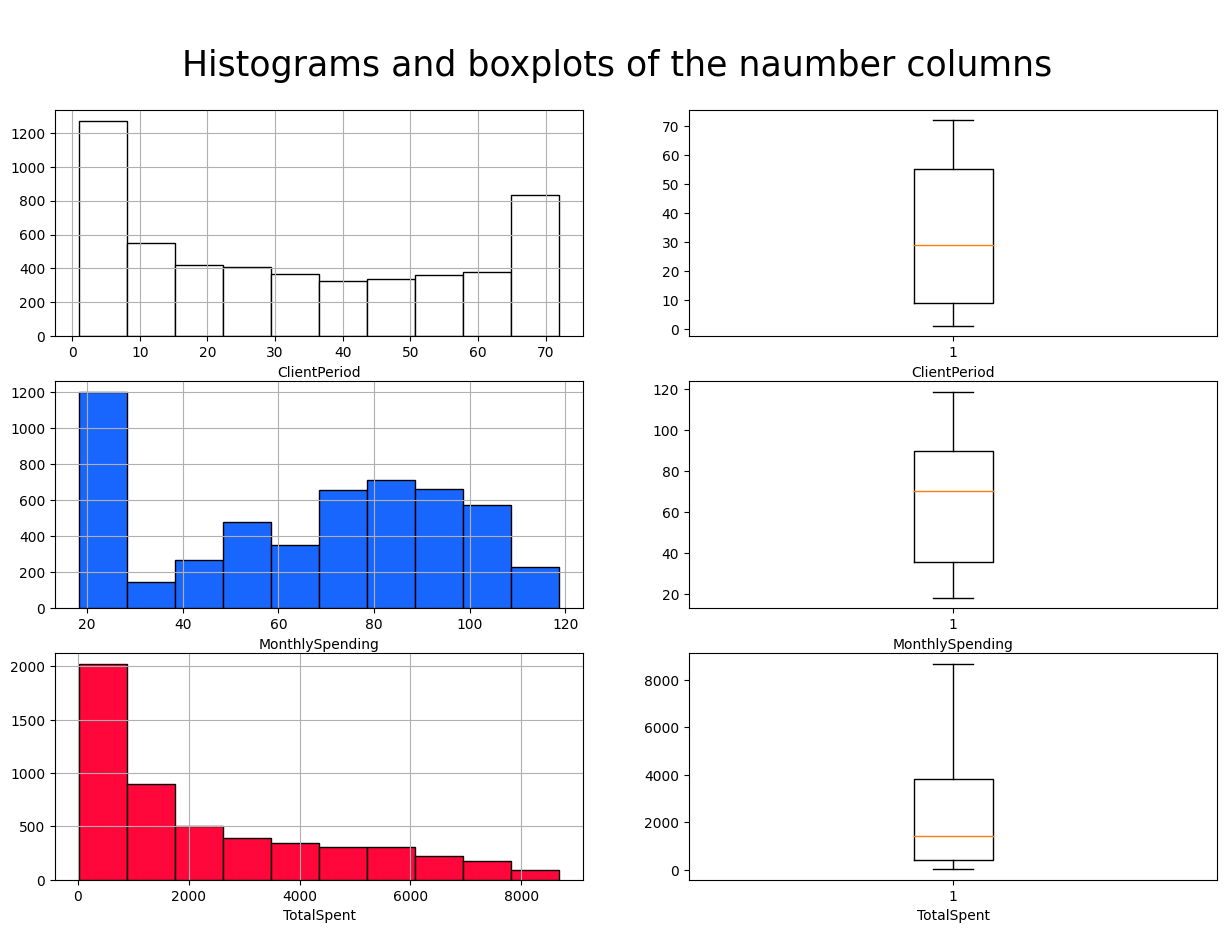

In [211]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,10))
fig.suptitle('\nHistograms and boxplots of the naumber columns', fontsize=25)
colors = ['#FFFFFF', '#1966FF', '#FF073A']
for i, col in enumerate(num_cols):
  data[col].hist(ax=axes[i, 0], color=colors[i], edgecolor = "black")
  axes[i, 1].boxplot(data[col])
  axes[i, 0].set_xlabel(col)
  axes[i, 1].set_xlabel(col)
plt.show()

### Смотрим категориальные признаки

<Figure size 640x480 with 0 Axes>

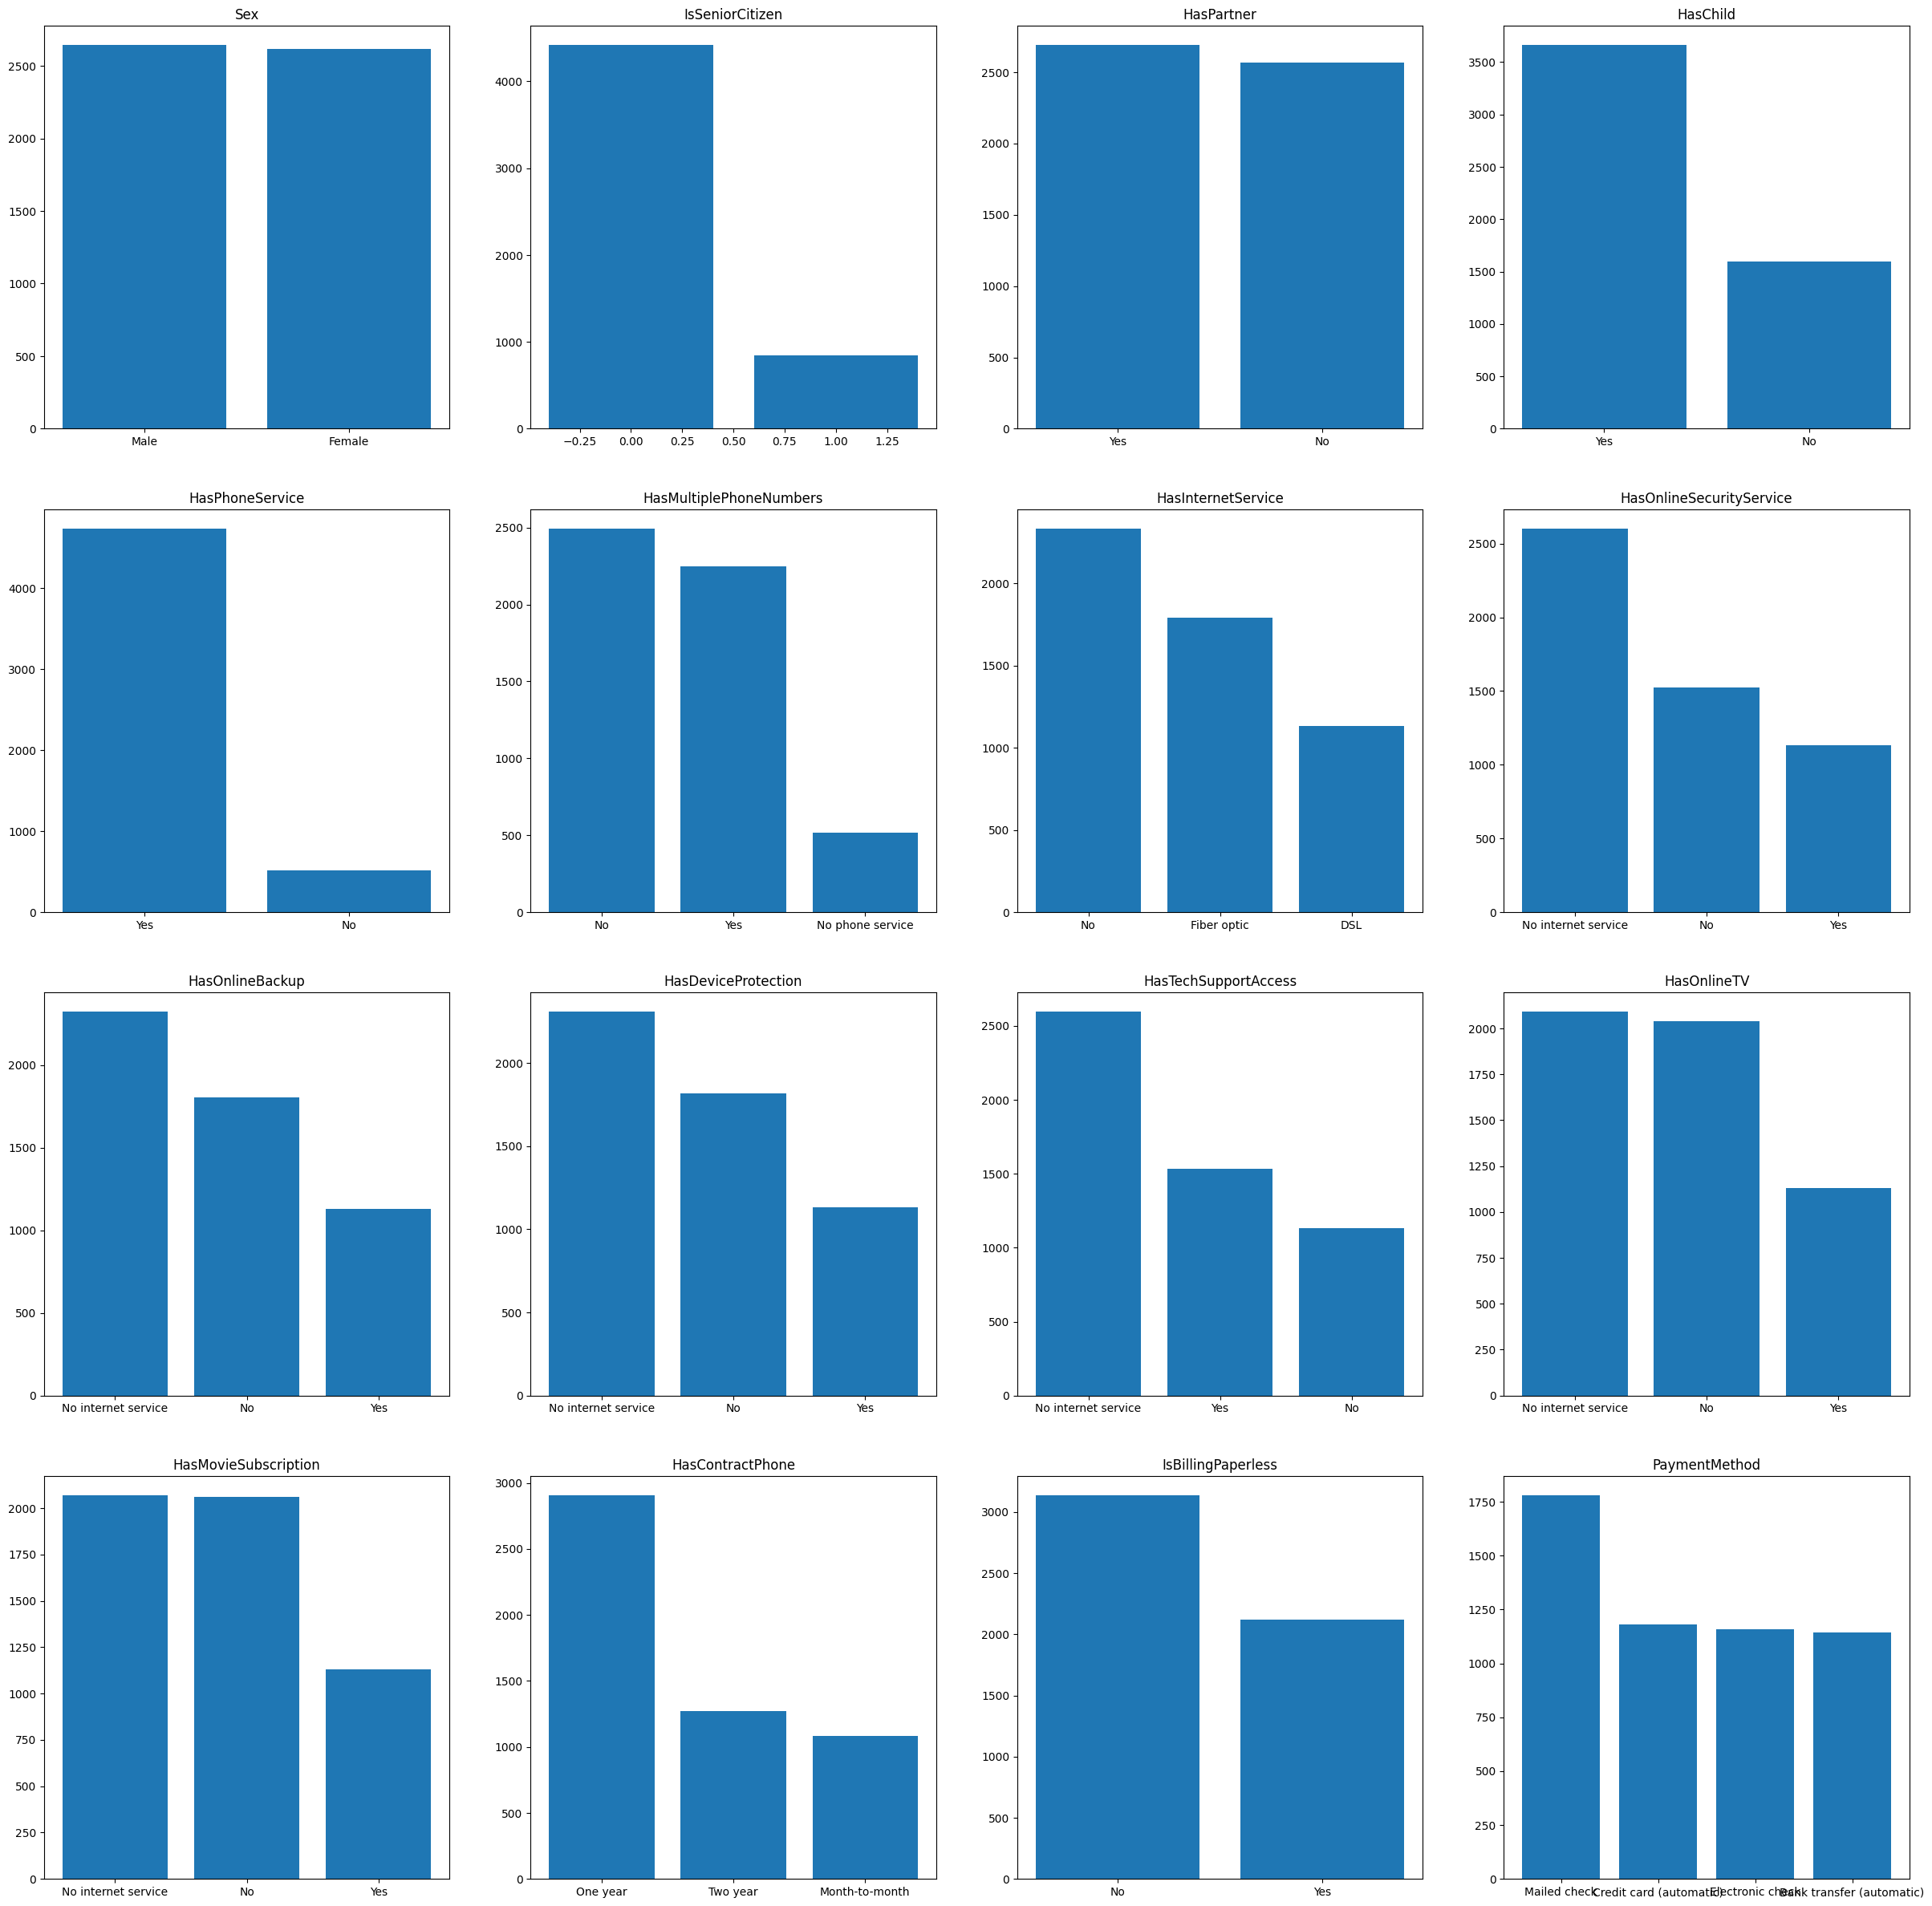

In [212]:
fig = plt.figure()
fig, axes = plt.subplots(ncols=4, nrows=4, figsize = (30, 30))

curr_col = 0
for i in range(4):
  for j in range(4):
    axes[i][j].bar(data[cat_cols[curr_col]].unique(), data[cat_cols[curr_col]].value_counts())
    axes[i][j].set_title(cat_cols[curr_col])
    curr_col += 1

Несбалансированные беды с HasPhoneService, IsSeniorCitizen и HasMultiplePhoneNumber, да и в целом так себе

## 2) Смотрим, что там с целевой переменной


<Axes: xlabel='Churn', ylabel='count'>

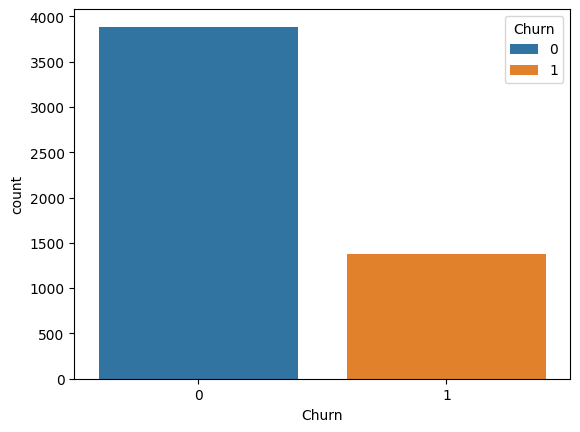

In [213]:
sns.countplot(data=data, x = target_col, hue = target_col)

Целевая переменная тоже плохо сбалансированна

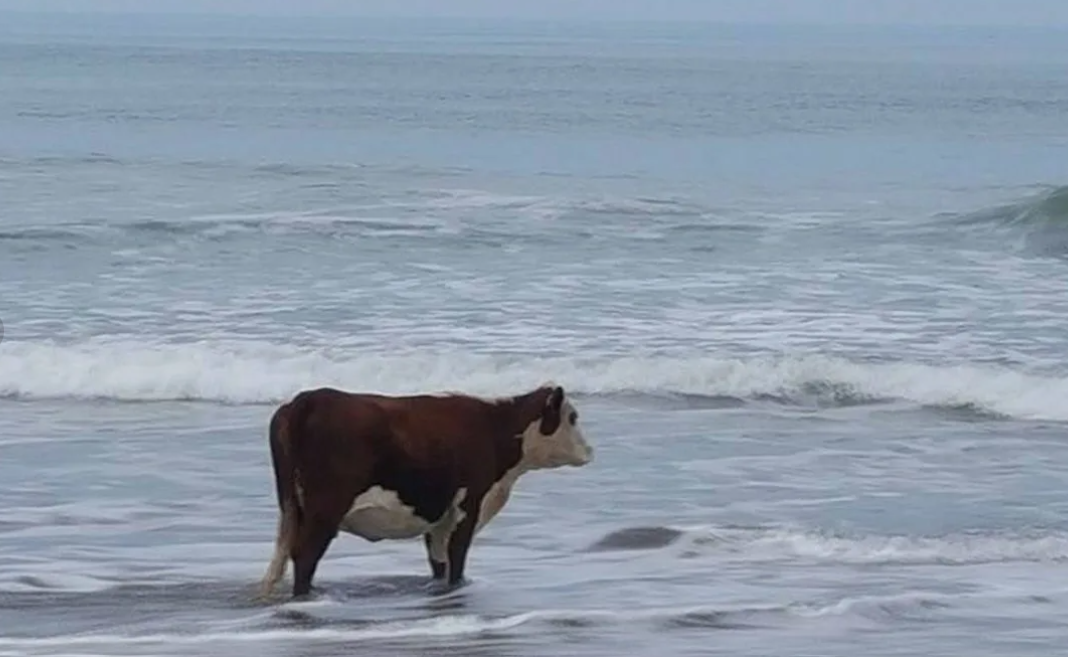

## 3) Тыкаемся с сиборном

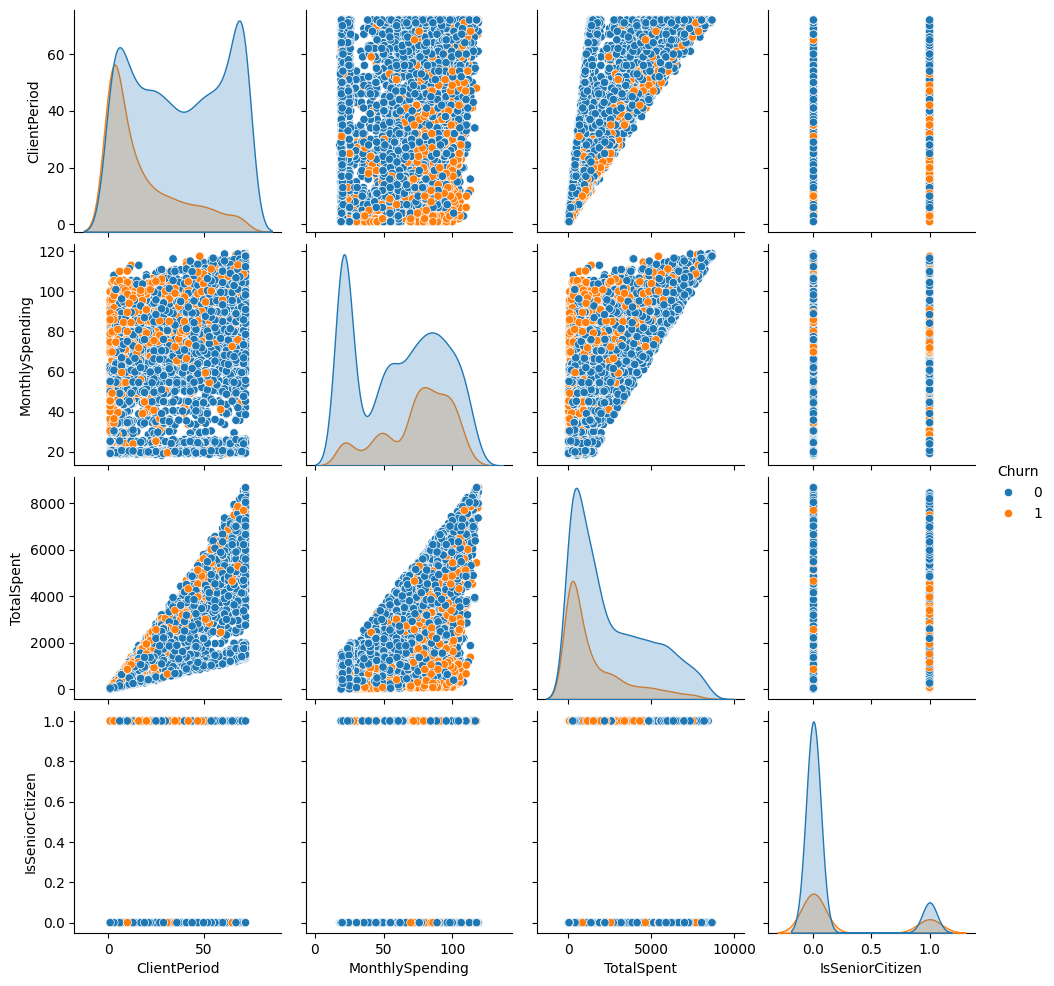

In [214]:
import seaborn as sns
sns.pairplot(data, hue=target_col);

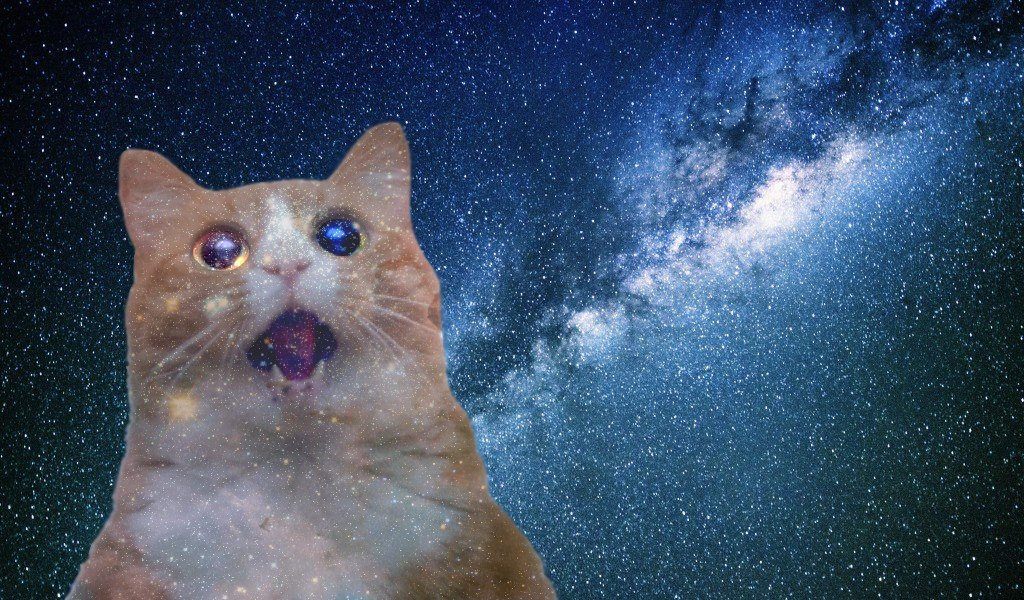

## 4) Эксперементируем с данными

### Смотрим датасетик

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Но для начала снова взглянем на данные

In [215]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
313,26,69.05,1815.65,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
2647,26,98.10,2510.70,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
376,21,99.15,1956.40,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
2152,12,49.05,593.05,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
2552,30,74.75,2111.30,Male,1,No,No,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
337,58,92.85,5305.05,Male,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
5169,22,100.75,2095.00,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
582,1,19.95,19.95,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,1
4441,69,109.95,7634.25,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0
1519,47,90.05,4137.20,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,0


### Строим матрицу корреляции, удаляем старые и генерируем новые признаки


Из диаграммы выше видим "вытянутое" распределение TotalSpent, применим логарифмическое преобразование

<Axes: xlabel='TotalSpent', ylabel='Count'>

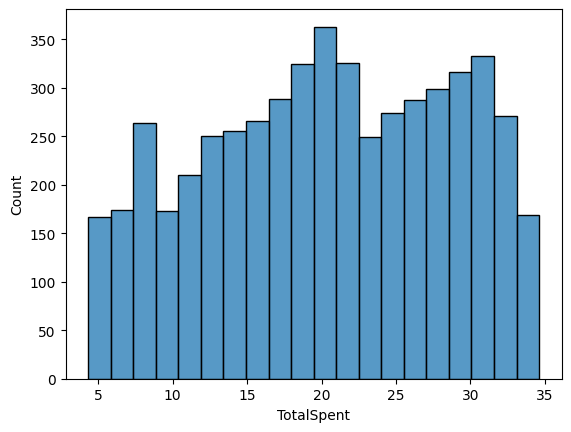

In [216]:
data["TotalSpent"] = stats.boxcox(data["TotalSpent"], lmbda=0.25)
sns.histplot(data["TotalSpent"])

Временно используем LabelEncoder, чтобы посмотреть матрицу корреляции для всех признаков

In [217]:
from sklearn.preprocessing import LabelEncoder
def show_corr_matrix(data):
  data_new = data.copy()
  for col in cat_cols:
    data_new[col] = LabelEncoder().fit_transform(data[col])

  sns.heatmap(data_new.corr())

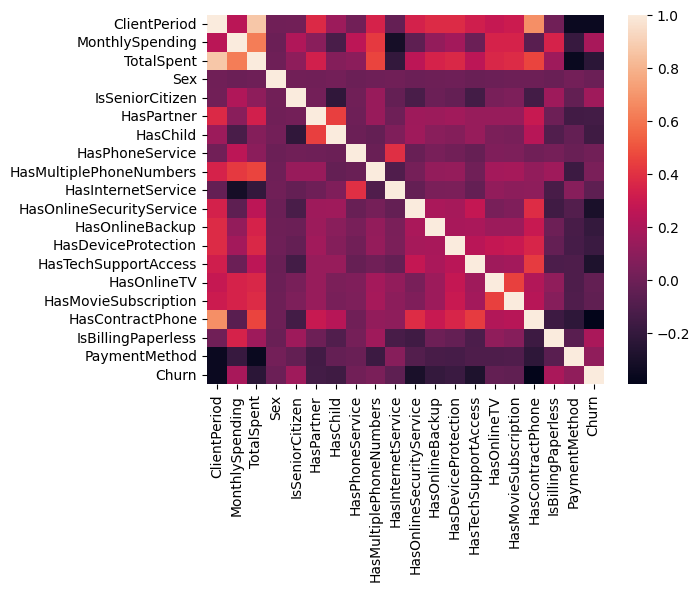

In [218]:
show_corr_matrix(data)

In [219]:
data.corr()["Churn"]

<ipython-input-219-4182faff4ac1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Churn"]


ClientPeriod      -0.350860
MonthlySpending    0.185487
TotalSpent        -0.234488
IsSeniorCitizen    0.157381
Churn              1.000000
Name: Churn, dtype: float64

Видим, что наши признаки в целом неплохо коррелириют с целевой перменной, это радует...

Зато видна корреляция между ClientPeriod и TotalSpent. Более того MonthlySpending полностью коррелирует с TotalSpent / ClientPeriod (я проверяла).
Это клиентский период и общее количество израсходованных средств, их корреляция логична, но просто удалять один из признаков я не буду, по моему, все они показательны.

Есть корреляция и между HasContractPhone и ClientPeriod. Но я так толком и не поняла, что такое contract phone, решила тоже не удалять

### Еще немного предобработки

In [296]:
for col in data[cat_cols].columns:
  print(col, ':', data[col].value_counts().to_dict())

Sex : {'Male': 2643, 'Female': 2616}
IsSeniorCitizen : {0: 4418, 1: 841}
HasPartner : {'No': 2690, 'Yes': 2569}
HasChild : {'No': 3662, 'Yes': 1597}
HasPhoneService : {'Yes': 4740, 'No': 519}
HasMultiplePhoneNumbers : {'No': 2494, 'Yes': 2246, 'No phone service': 519}
HasInternetService : {'Fiber optic': 2335, 'DSL': 1793, 'No': 1131}
HasOnlineSecurityService : {'No': 2603, 'Yes': 1525, 'No internet service': 1131}
HasOnlineBackup : {'No': 2323, 'Yes': 1805, 'No internet service': 1131}
HasDeviceProtection : {'No': 2308, 'Yes': 1820, 'No internet service': 1131}
HasTechSupportAccess : {'No': 2595, 'Yes': 1533, 'No internet service': 1131}
HasOnlineTV : {'No': 2090, 'Yes': 2038, 'No internet service': 1131}
HasMovieSubscription : {'No': 2069, 'Yes': 2059, 'No internet service': 1131}
HasContractPhone : {'Month-to-month': 2906, 'Two year': 1272, 'One year': 1081}
IsBillingPaperless : {'Yes': 3137, 'No': 2122}
PaymentMethod : {'Electronic check': 1780, 'Mailed check': 1180, 'Bank transfer

Видим что информация о HasInternetService повторяется в других фичах, это создаст проблемы при преобразовании one-hot encoding

Сделаем разбиение на train/valid/test

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

y = data[target_col]
X = data.drop(target_col, axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15)

In [298]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoder.fit(X_train[cat_cols])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [299]:
data_encoded_train = pd.DataFrame(encoder.transform(X_train[cat_cols]).toarray(), columns=encoder.get_feature_names_out())
data_encoded_valid = pd.DataFrame(encoder.transform(X_valid[cat_cols]).toarray(), columns=encoder.get_feature_names_out())
X_test = pd.read_csv('./test.csv')
column_to_float(X_test, "TotalSpent")
data_encoded_test = pd.DataFrame(encoder.transform(X_test[cat_cols]).toarray(), columns=encoder.get_feature_names_out())

убедимся, что есть повторяющиеся столбцы

<Axes: >

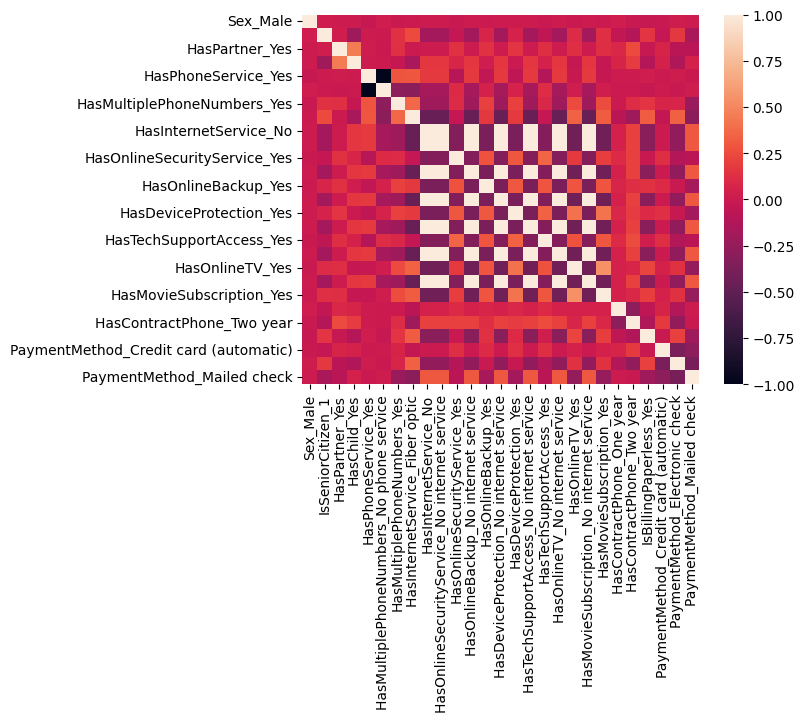

In [300]:
sns.heatmap(data_encoded_train.corr())

получился ковер

Избавимся от одинаковых значений, сначала найдем все колонки, содержащие строку 'No phone service'

In [301]:
for col in data_encoded_train.columns:
  if 'No phone service' in col:
    print(col)

HasMultiplePhoneNumbers_No phone service


In [302]:
data_encoded_train['HasMultiplePhoneNumbers_No phone service'].sum(), data_encoded_train.shape[0] - data_encoded_train['HasPhoneService_Yes'].sum()

(442.0, 442.0)

Делаем вывод, что фичи 'HasMultiplePhoneNumbers_No phone service' и 'HasPhoneService_Yes' совпадают. Удалим 'HasMultiplePhoneNumbers_No phone service' из выборок.

In [303]:
data_encoded_train = data_encoded_train.drop('HasMultiplePhoneNumbers_No phone service', axis=1)
data_encoded_valid = data_encoded_valid.drop('HasMultiplePhoneNumbers_No phone service', axis=1)
data_encoded_test = data_encoded_test.drop('HasMultiplePhoneNumbers_No phone service', axis=1)

In [304]:
duplicated_cols = []
for col in data_encoded_train.columns:
  if 'No internet service' in col:
    duplicated_cols.append(col)
data_encoded_train[duplicated_cols].sum()

HasOnlineSecurityService_No internet service    964.0
HasOnlineBackup_No internet service             964.0
HasDeviceProtection_No internet service         964.0
HasTechSupportAccess_No internet service        964.0
HasOnlineTV_No internet service                 964.0
HasMovieSubscription_No internet service        964.0
dtype: float64

Снова повторения, на этот раз с 'HasInternetService_No', удаляем...

In [305]:
data_encoded_train = data_encoded_train.drop(duplicated_cols, axis=1)
data_encoded_valid = data_encoded_valid.drop(duplicated_cols, axis=1)
data_encoded_test = data_encoded_test.drop(duplicated_cols, axis=1)

<Axes: >

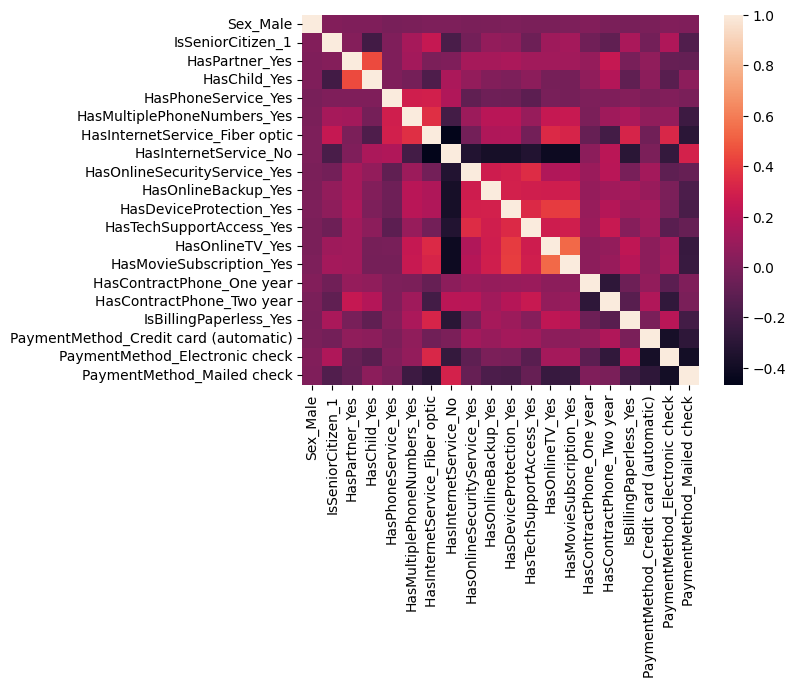

In [306]:
sns.heatmap(data_encoded_train.corr())

Шкалируем признаки

In [307]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scal_train = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns = num_cols)
data_scal_valid = pd.DataFrame(scaler.transform(X_valid[num_cols]), columns = num_cols)
data_scal_test = pd.DataFrame(scaler.transform(X_test[num_cols]), columns = num_cols)
X_train = pd.concat([data_scal_train, data_encoded_train], axis=1)
X_valid = pd.concat([data_scal_valid, data_encoded_valid], axis=1)
X_test = pd.concat([data_scal_test, data_encoded_test], axis=1)

### Боремся с выбросами

In [233]:
def find_outliers(data):
  X_train_new = data.copy()
  print("First shape: ", data.shape)
  for col in num_cols:
    q_low = data[col].quantile(0.01)
    q_hi  = data[col].quantile(0.99)

    X_train_new = data[(X_train[col] < q_hi) & (data[col] > q_low)]

  print("New shape: ", X_train_new.shape)
  return X_train_new

In [235]:
data_filtered = find_outliers(X_train)

First shape:  (4470, 23)
New shape:  (4378, 23)


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [236]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

### 1) Уже сделала выше

вот доказательство

In [194]:
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,...,HasDeviceProtection_Yes,HasTechSupportAccess_Yes,HasOnlineTV_Yes,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.477878,-1.492277,-0.772898,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.296924,-0.487032,-1.690140,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.242119,1.440516,1.473086,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.296924,0.149954,-1.580452,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.242119,0.496648,1.130225,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,-1.296924,0.156590,-1.579436,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4466,-1.296924,0.647600,-1.509652,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4467,-0.395973,0.632671,0.258929,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4468,-0.559782,-0.679456,-0.314353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


### 2) Используем LogisticRegressionCV

In [243]:
lrcv = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, scoring='roc_auc')

Лучшие параметры:

In [244]:
lrcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [254]:
def print_score(X_train, X_valid, y_train, y_valid, lrcv):
  print("ROC AUC на тренировочных данных:", end=' ')
  print(roc_auc_score(y_train, lrcv.predict_proba(X_train)[:, 1]))
  print('-'*55)
  print("ROC AUC на валидационных данных:", end=' ')
  print(roc_auc_score(y_valid, lrcv.predict_proba(X_valid)[:, 1]))

In [255]:
print_score(X_train, X_valid, y_train, y_valid, lrcv)

ROC AUC на тренировочных данных: 0.8487589239230459
-------------------------------------------------------
ROC AUC на валидационных данных: 0.8626378215836953


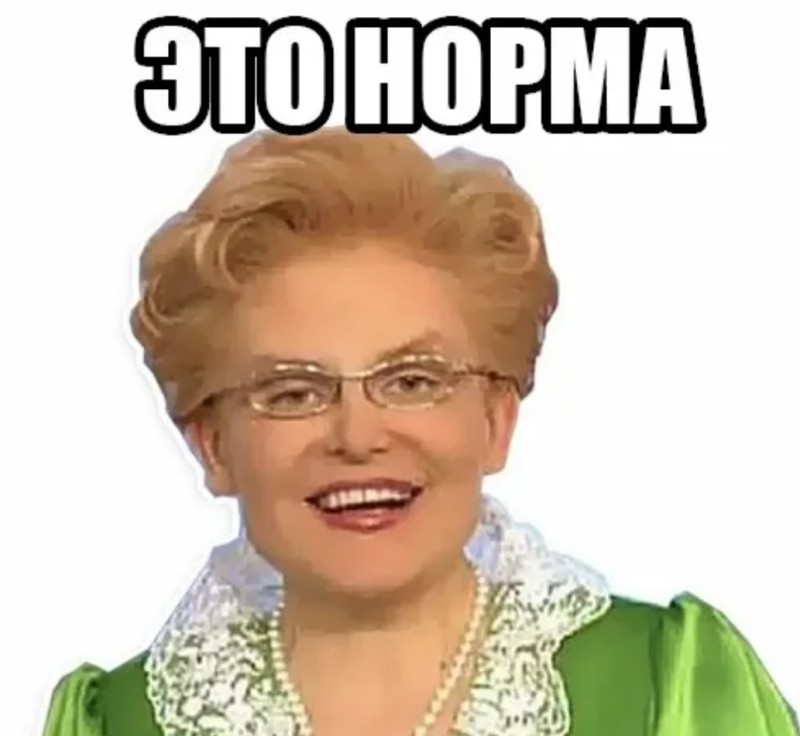

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

### 1) Стандартный catboost

In [256]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.2 MB/s eta 0:00:00


In [265]:
import catboost
from catboost import CatBoostClassifier

In [266]:
y = data[target_col]
X = data.drop(target_col, axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15)

Пробуем catboost без параметров

In [267]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.019526
0:	learn: 0.6800932	total: 17.2ms	remaining: 17.2s
1:	learn: 0.6664035	total: 33.3ms	remaining: 16.6s
2:	learn: 0.6554433	total: 43.5ms	remaining: 14.4s
3:	learn: 0.6449762	total: 58.1ms	remaining: 14.5s
4:	learn: 0.6340292	total: 73.1ms	remaining: 14.5s
5:	learn: 0.6234956	total: 88ms	remaining: 14.6s
6:	learn: 0.6132593	total: 103ms	remaining: 14.7s
7:	learn: 0.6050139	total: 113ms	remaining: 14s
8:	learn: 0.5970951	total: 122ms	remaining: 13.4s
9:	learn: 0.5886514	total: 137ms	remaining: 13.6s
10:	learn: 0.5800991	total: 153ms	remaining: 13.7s
11:	learn: 0.5730557	total: 167ms	remaining: 13.7s
12:	learn: 0.5656319	total: 180ms	remaining: 13.7s
13:	learn: 0.5586112	total: 199ms	remaining: 14s
14:	learn: 0.5523572	total: 215ms	remaining: 14.1s
15:	learn: 0.5467261	total: 227ms	remaining: 14s
16:	learn: 0.5407054	total: 242ms	remaining: 14s
17:	learn: 0.5348721	total: 258ms	remaining: 14.1s
18:	learn: 0.5299144	total: 272ms	remaining: 14s
19:	learn: 0.5247

In [268]:
print_score(X_train, X_valid, y_train, y_valid, cat)

ROC AUC на тренировочных данных: 0.8936886966067221
-------------------------------------------------------
ROC AUC на валидационных данных: 0.8436206456008857


Сомнительно но окэй

### 2) Используем grid_search из библиотеки catboost

In [269]:
train_dataset = catboost.Pool(X_train, y_train, cat_features=cat_cols)
eval_dataset = catboost.Pool(X_valid, y_valid, cat_features=cat_cols)
cat2 = CatBoostClassifier(eval_metric='AUC')
grid = {'learning_rate': [0.001, 0.1, 0.1],
        'l2_leaf_reg': [2, 3, 5],
        'max_depth': [5, 8, 10],
        'iterations': [100, 250, 500]}

grid_search_result = cat2.grid_search(grid, train_dataset, refit=True, verbose=500)

Выходные данные были обрезаны до нескольких последних строк (5000).
117:	test: 0.8180312	best: 0.8192495 (2)	total: 5.37s	remaining: 6.01s
118:	test: 0.8185394	best: 0.8192495 (2)	total: 5.44s	remaining: 5.98s
119:	test: 0.8185742	best: 0.8192495 (2)	total: 5.49s	remaining: 5.95s
120:	test: 0.8184698	best: 0.8192495 (2)	total: 5.55s	remaining: 5.92s
121:	test: 0.8187274	best: 0.8192495 (2)	total: 5.61s	remaining: 5.88s
122:	test: 0.8188318	best: 0.8192495 (2)	total: 5.68s	remaining: 5.86s
123:	test: 0.8187552	best: 0.8192495 (2)	total: 5.73s	remaining: 5.82s
124:	test: 0.8183584	best: 0.8192495 (2)	total: 5.78s	remaining: 5.78s
125:	test: 0.8179685	best: 0.8192495 (2)	total: 5.84s	remaining: 5.75s
126:	test: 0.8179546	best: 0.8192495 (2)	total: 5.9s	remaining: 5.71s
127:	test: 0.8179755	best: 0.8192495 (2)	total: 5.96s	remaining: 5.68s
128:	test: 0.8171888	best: 0.8192495 (2)	total: 6.02s	remaining: 5.65s
129:	test: 0.8169799	best: 0.8192495 (2)	total: 6.1s	remaining: 5.63s
130:	test: 

Смотрим лучшие параметры:

In [270]:
cat2.get_params()

{'eval_metric': 'AUC',
 'depth': 5,
 'learning_rate': 0.1,
 'l2_leaf_reg': 3,
 'iterations': 100}

In [271]:
print_score(X_train, X_valid, y_train, y_valid, cat2)

ROC AUC на тренировочных данных: 0.8610366448196818
-------------------------------------------------------
ROC AUC на валидационных данных: 0.847521505834256


# Предсказания

Линейная регрессия хоть и была больше всех на valid, оказалась хуже на test

In [309]:
best_model = cat2

In [313]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

У меня получился score 0.85628

Вот и все...

я хотела больше мемов, но в какой-то момент перестали грузиться фотки(((((

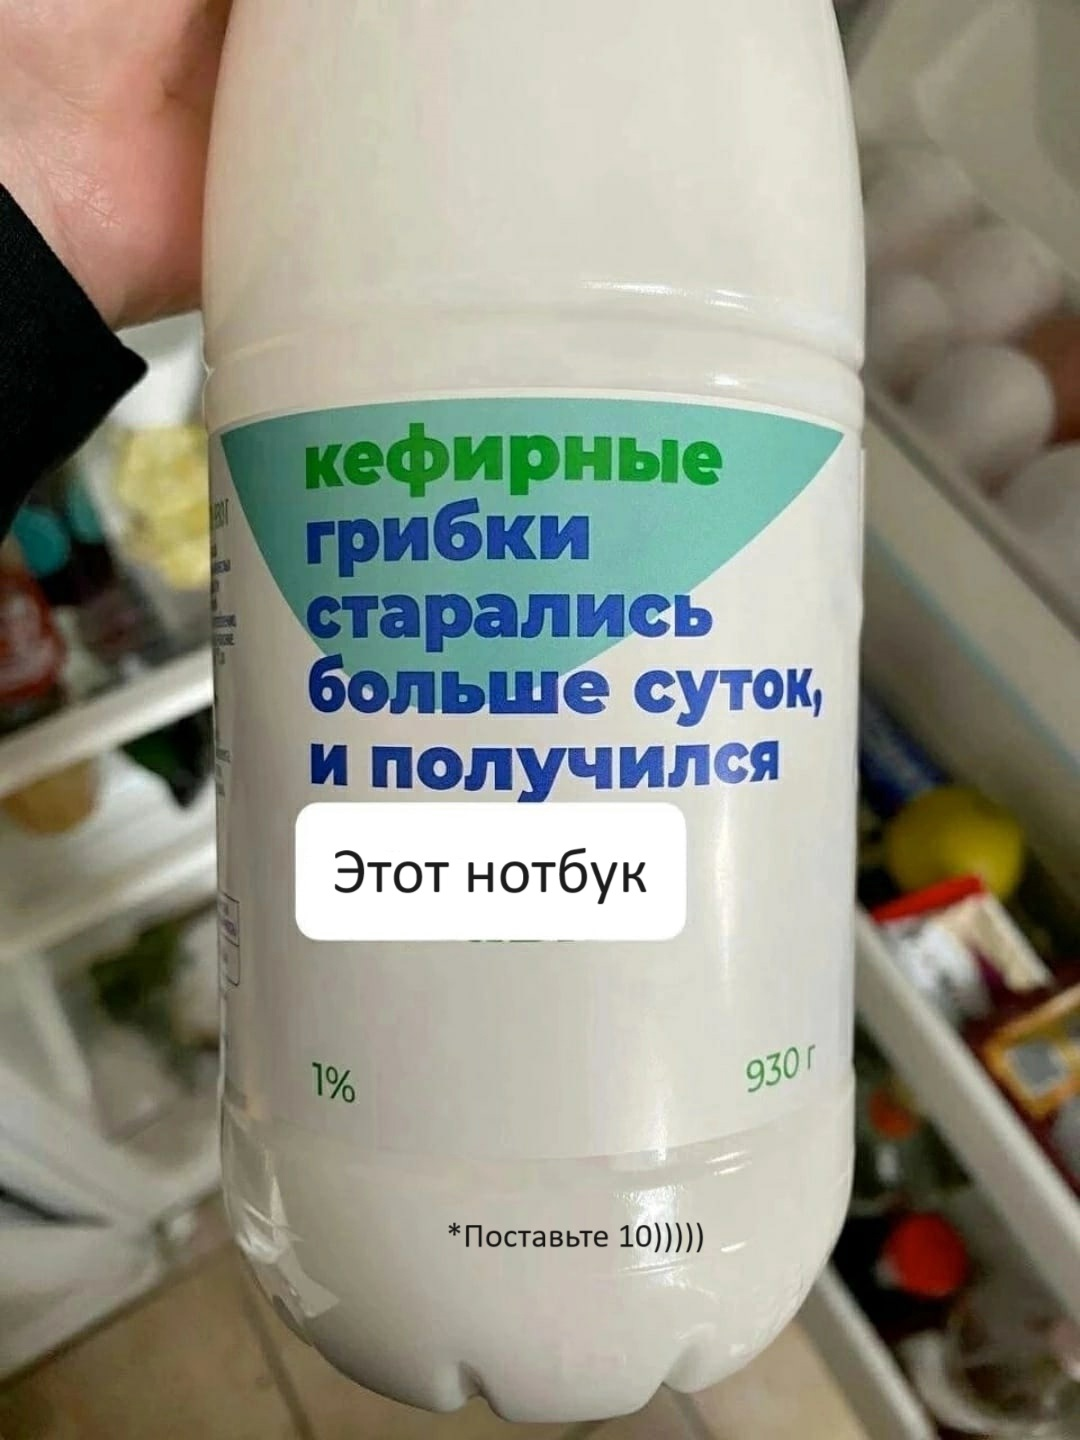